**Imported all the libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from IPython.display import clear_output
import math

**Read the data**

In [2]:
data = pd.read_csv("california_housing_train.csv")

**Seperated the target variable and features from the dataset**

In [3]:
target_var = data['median_house_value']
features = data.drop(['median_house_value'],axis = 1).copy()

In [4]:
features = features/features.max()
target_var = target_var/target_var.max()

**We converted the data into numpy array first and then we reshaped it according to our needs**

In [5]:
target_var = np.array(target_var)
target_var = np.reshape(target_var,[1,len(target_var)])
print(target_var.shape)

(1, 17000)


In [6]:
features = np.array(features)

**Printed the shapes of features as well as target variable**

In [7]:
print("Feature Shape: ",features.shape)
print("Target Variable Shape: ",target_var.shape)

Feature Shape:  (17000, 8)
Target Variable Shape:  (1, 17000)


**Here we are making all the necessary functions**

In [8]:
def line_multidim(m,x,c):
  return np.dot(m,x.T) + c

def error(m,x,c,y):
  return np.mean((line_multidim(m,x,c) - y)**2)

def derivative_slopes(m,x,c,y):
  return 2*np.mean(np.multiply((line_multidim(m,x,c)-y),x.T),axis = 1)

def derivative_intercept(m,x,c,y):
  return 2*np.mean((line_multidim(m,x,c)-y))

def accuracy_pred(error,y):
  return 100 - (error/np.mean(y**2))*100

Current Error:  0.03300438146485286 Current Iteration: 3999
Current Accuracy: 85.37685032544351


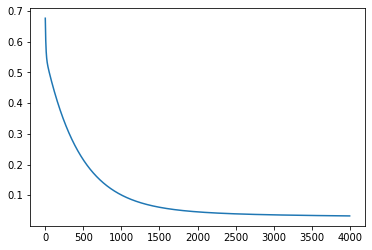

In [14]:
m = np.random.randn(1,8) # or [random.random(), random.random()]
c = random.random()

iterations = 4000
lr = 0.01
error_array = []

for i in range(0,iterations):
  m = m - lr*derivative_slopes(m,features,c,target_var)
  c = c - lr*derivative_intercept(m,features,c,target_var)
  error_array.append(error(m,features,c,target_var))
  clear_output(True)
  print("Current Error: ",error(m,features,c,target_var),"Current Iteration:",i)
  print("Current Accuracy:",accuracy_pred(error(m,features,c,target_var),target_var))
  
plt.plot(error_array)
plt.show()

Finding the correlation

In [15]:
def correlation(x,y):
  return (np.sum((x-np.mean(x))*(y-np.mean(y))))/(np.sum((x-np.mean(x))**2) * np.sum((y-np.mean(y))**2))**0.5

In [16]:
x = np.random.randn(1,10)
y = np.random.randn(1,10)

correlation(data['total_rooms'],data['median_house_value'])

0.13099146625326671